# Notebook resumen
Para este proyecto de Machine Learning, hemos elegido un set de datos de Kaggle que contiene un ranking de los 100 repositorios de Python mas populares desde diciembre de 2018 hasta el inicio del trabajo en febrero de 2024. El objetivo es crear un modelo que prediga el n√∫mero de forks que se realizan sobre un repostorio.

## Librerias

In [2]:
# Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualizaci√≥n
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from matplotlib.ticker import FixedLocator, FixedFormatter

import seaborn as sns

# Preporcesado
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Clusterinzaci√≥n
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Baselines y optimizaci√≥n
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# nlp
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Warnigs
import warnings
warnings.filterwarnings("ignore")

## Carga de datos

In [3]:
df = pd.read_csv("..\data\\raw\popular_python_projects.csv")

## √çndice

1. EDA

2. Limpieza

3. Feature engeneering

4. Transformaciones y escalado

5. Clusterizaci√≥n

6. Modelo cluster 0

7. Modelo cluster 1

8. Modelo cluster 2
 
9. Modelo cluster 3

10. Modelo cluster 0

## 1. EDA

### Primera exploraci√≥n

In [4]:
df.head()

date  rank    item             repo_name  stars  forks language  \
0  2018-12-18     1  Python        awesome-python  58777  11448   Python   
1  2018-12-18     2  Python  system-design-primer  53575   7570   Python   
2  2018-12-18     3  Python                models  46039  28053   Python   
3  2018-12-18     4  Python           public-apis  45373   4707   Python   
4  2018-12-18     5  Python            youtube-dl  44956   7820   Python   

                                            repo_url     username  issues  \
0            https://github.com/vinta/awesome-python        vinta     439   
1  https://github.com/donnemartin/system-design-p...  donnemartin      68   
2               https://github.com/tensorflow/models   tensorflow    1324   
3           https://github.com/toddmotto/public-apis    toddmotto       5   
4                  https://github.com/rg3/youtube-dl          rg3    2566   

            last_commit                                        description  
0  2018-12-13T08:29:32Z  A curated list of awesome Python frameworks, l...  
1  2018-12-18T11:20:56Z  Learn how to design large-scale systems. Prep ...  
2  2018-12-18T02:29:33Z          Models and examples built with TensorFlow  
3  2018-12-18T11:24:53Z  A collective list of free APIs for use in soft...  
4  2018-12-18T11:18:21Z  Command-line program to download videos from Y...

In [5]:
df.tail()

date  rank    item               repo_name  stars  forks  \
170275  2024-02-03    96  Python               diffusers  20767   4297   
170276  2024-02-03    97  Python  Awesome-Linux-Software  20672   2005   
170277  2024-02-03    98  Python             insightface  20230   5040   
170278  2024-02-03    99  Python                   Gooey  20130   1091   
170279  2024-02-03   100  Python            DeepFaceLive  20093   3172   

       language                                           repo_url  \
170275   Python           https://github.com/huggingface/diffusers   
170276   Python  https://github.com/luong-komorebi/Awesome-Linu...   
170277   Python         https://github.com/deepinsight/insightface   
170278   Python                https://github.com/chriskiehl/Gooey   
170279   Python             https://github.com/iperov/DeepFaceLive   

              username  issues           last_commit  \
170275     huggingface     289  2024-02-03T02:59:18Z   
170276  luong-komorebi       8  2024-01-27T10:02:38Z   
170277     deepinsight    1011  2023-12-24T05:29:03Z   
170278      chriskiehl     126  2024-01-29T12:27:25Z   
170279          iperov       1  2023-07-28T10:14:16Z   

                                              description  
170275  ü§ó Diffusers: State-of-the-art diffusion models...  
170276               üêß A list of awesome Linux softwares   
170277   State-of-the-art 2D and 3D Face Analysis Project  
170278  Turn (almost) any Python command line program ...  
170279  Real-time face swap for PC streaming or video ...

In [6]:
df.shape

(170280, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170280 entries, 0 to 170279
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         170280 non-null  object
 1   rank         170280 non-null  int64 
 2   item         170280 non-null  object
 3   repo_name    170280 non-null  object
 4   stars        170280 non-null  int64 
 5   forks        170280 non-null  int64 
 6   language     170280 non-null  object
 7   repo_url     170280 non-null  object
 8   username     170280 non-null  object
 9   issues       170280 non-null  int64 
 10  last_commit  170280 non-null  object
 11  description  168687 non-null  object
dtypes: int64(4), object(8)
memory usage: 15.6+ MB


Si el ranking es el top 100, eso quiere decir que siempre que se actualiza la base de datos se a√±ade una entrada por puesto.

In [8]:
df["rank"].value_counts()

rank
1      1722
32     1722
34     1722
35     1722
36     1722
       ... 
75     1674
76     1674
77     1674
78     1674
100    1674
Name: count, Length: 100, dtype: int64

In [9]:
#comprobamos que el ranking tiene distintos repositorios
df[df["rank"] == 1] 

date  rank    item       repo_name   stars  forks language  \
0       2018-12-18     1  Python  awesome-python   58777  11448   Python   
100     2018-12-19     1  Python  awesome-python   58801  11454   Python   
200     2018-12-20     1  Python  awesome-python   58840  11455   Python   
300     2018-12-21     1  Python  awesome-python   58882  11465   Python   
400     2018-12-22     1  Python  awesome-python   58936  11470   Python   
...            ...   ...     ...             ...     ...    ...      ...   
169780  2024-01-30     1  Python     public-apis  277535  31168   Python   
169880  2024-01-31     1  Python     public-apis  277656  31177   Python   
169980  2024-02-01     1  Python     public-apis  277800  31191   Python   
170080  2024-02-02     1  Python     public-apis  277965  31207   Python   
170180  2024-02-03     1  Python     public-apis  278085  31228   Python   

                                          repo_url     username  issues  \
0          https://github.com/vinta/awesome-python        vinta     439   
100        https://github.com/vinta/awesome-python        vinta     439   
200        https://github.com/vinta/awesome-python        vinta     439   
300        https://github.com/vinta/awesome-python        vinta     440   
400        https://github.com/vinta/awesome-python        vinta     439   
...                                            ...          ...     ...   
169780  https://github.com/public-apis/public-apis  public-apis       4   
169880  https://github.com/public-apis/public-apis  public-apis       2   
169980  https://github.com/public-apis/public-apis  public-apis       2   
170080  https://github.com/public-apis/public-apis  public-apis       2   
170180  https://github.com/public-apis/public-apis  public-apis       2   

                 last_commit  \
0       2018-12-13T08:29:32Z   
100     2018-12-13T08:29:32Z   
200     2018-12-20T06:49:58Z   
300     2018-12-20T12:52:04Z   
400     2018-12-20T12:52:04Z   
...                      ...   
169780  2024-01-28T01:47:43Z   
169880  2024-01-28T01:47:43Z   
169980  2024-01-31T06:04:35Z   
170080  2024-02-01T09:06:25Z   
170180  2024-02-01T09:06:25Z   

                                              description  
0       A curated list of awesome Python frameworks, l...  
100     A curated list of awesome Python frameworks, l...  
200     A curated list of awesome Python frameworks, l...  
300     A curated list of awesome Python frameworks, l...  
400     A curated list of awesome Python frameworks, l...  
...                                                   ...  
169780                     A collective list of free APIs  
169880                     A collective list of free APIs  
169980                     A collective list of free APIs  
170080                     A collective list of free APIs  
170180                     A collective list of free APIs  

[1722 rows x 12 columns]

In [10]:
df["language"].value_counts()

language
Python    170280
Name: count, dtype: int64

In [11]:
df["item"].value_counts()

item
Python    170280
Name: count, dtype: int64

In [12]:
# cantindad de nulos
df.isna().sum()/len(df)

date           0.000000
rank           0.000000
item           0.000000
repo_name      0.000000
stars          0.000000
forks          0.000000
language       0.000000
repo_url       0.000000
username       0.000000
issues         0.000000
last_commit    0.000000
description    0.009355
dtype: float64

In [13]:
# un repositorio se puede repetir?
df["repo_name"].value_counts()

repo_name
Python                         2343
algo                           1799
big-list-of-naughty-strings    1247
glances                        1246
ansible                        1242
                               ... 
paraphraser                       1
keras-squeezenet                  1
One-Shot-Object-Detection         1
face.evoLVe                       1
sae-python-dev-guide              1
Name: count, Length: 4247, dtype: int64

In [14]:
df.describe()

rank          stars          forks         issues
count  170280.000000  170280.000000  170280.000000  170280.000000
mean       50.161734   24222.825476    5317.970302     428.204205
std        28.825082   22172.348577    6466.364554     953.338588
min         1.000000     207.000000       0.000000       0.000000
25%        25.000000   13090.000000    1658.000000      32.000000
50%        50.000000   18139.000000    3260.000000     136.000000
75%        75.000000   28049.250000    6252.000000     381.000000
max       100.000000  278085.000000   51066.000000   16431.000000

Tras una primera exploraci√≥n estas son las principales caracter√≠sticas del set de datos:
- Cada semana se actualiza el ranking de ranking 100 de los repositiorios.
- Existen repositorios con distintas entradas, pues si cuando se actualiz√≥ el set de datos se manten√≠a en el top 100 se a√±ade tambi√©n, pero se actualiza su ranking, forks e issues.
- Las variables item y lenguaje no aportan informaci√≥n porque ambas indican que el el repositorio es en lenguaje python.
- El dataframe apenas tiene valores nulos (solo hay en la variable *description* y no llega al 1%) y no tiene duplicados.

### Cardinalidad

In [15]:
def cardinalidad(df):

    columnas = df.columns

    unicos = df.nunique()

    card_100 = [(df[i].nunique()/len(df))*100 for i in df]

    tipo_dato = []
    
    for x in df.columns:
        if df[x].dtypes == '<M8[ns]':
            y = "datetime"
            tipo_dato.append(y)
        elif df[x].nunique() == 2:
            y = "boolean"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "O":
            y = "categorical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "float64":
            y = "numerical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "int64":
            y = "numerical"
            tipo_dato.append(y)

    cardinality = pd.DataFrame({"Columna":columnas, "Total de √∫nicos":unicos, 
                                "Cardinalidad (%)":card_100, "Tipo de dato": tipo_dato}).set_index("Columna")
    
    return cardinality

In [16]:
df_cardinalidad = cardinalidad(df).sort_values(by="Total de √∫nicos", ascending=False)
df_cardinalidad

Total de √∫nicos  Cardinalidad (%) Tipo de dato
Columna                                                    
last_commit            74700         43.868922  categorical
stars                  52175         30.640709    numerical
forks                  22522         13.226451    numerical
issues                  4874          2.862344    numerical
description             4573          2.685577  categorical
repo_url                4364          2.562838  categorical
repo_name               4247          2.494127  categorical
username                3493          2.051327  categorical
date                    1722          1.011276  categorical
rank                     100          0.058727    numerical
item                       1          0.000587  categorical
language                   1          0.000587  categorical

Las variables *last_commit* y *date* tienen el *type* mal aplicado, procedemos a pasarlos a formato ``datetime`` para poder trabajar correctamente con estas variables.

In [17]:
df["last_commit"] = pd.to_datetime(df["last_commit"])
df["date"] = pd.to_datetime(df["date"])

### An√°lisis univariante

Tras la primera exploraci√≥n y el estudio de la cardinaldidad conclu√≠mos que las columnas *repo_url*, *item* y *language* puesto que no aportan informaci√≥n relevante.

In [18]:
df.drop(columns=["repo_url", "item", "language"], inplace= True)

array([[<Axes: title={'center': 'stars'}>,
        <Axes: title={'center': 'forks'}>],
       [<Axes: title={'center': 'issues'}>,
        <Axes: title={'center': 'rank'}>]], dtype=object)

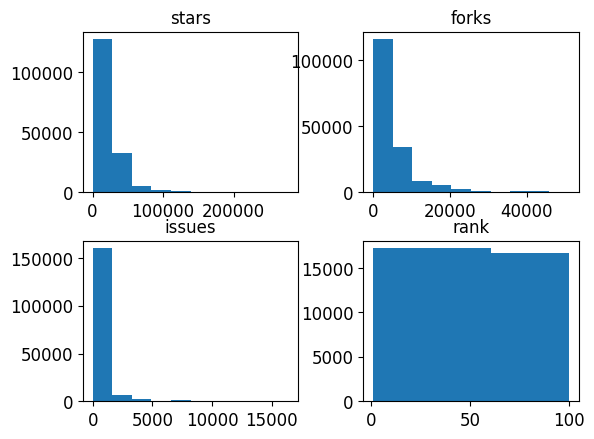

In [19]:
#distribuci√≥n de las columnas n√∫mericas
numerical_col = list(df_cardinalidad["Tipo de dato"][df_cardinalidad["Tipo de dato"] == "numerical"].index)
df[numerical_col].hist(grid=False)

array([[<Axes: title={'center': 'last_commit'}>,
        <Axes: title={'center': 'date'}>]], dtype=object)

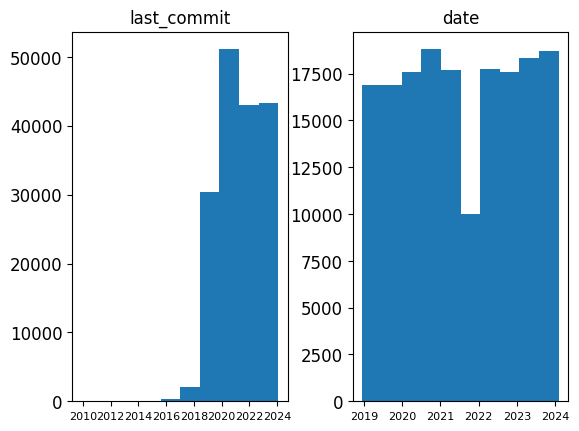

In [20]:
# distribuci√≥n de las columnas datetime
df[["last_commit", "date"]].hist(grid=False, xlabelsize=(8))

([], [])

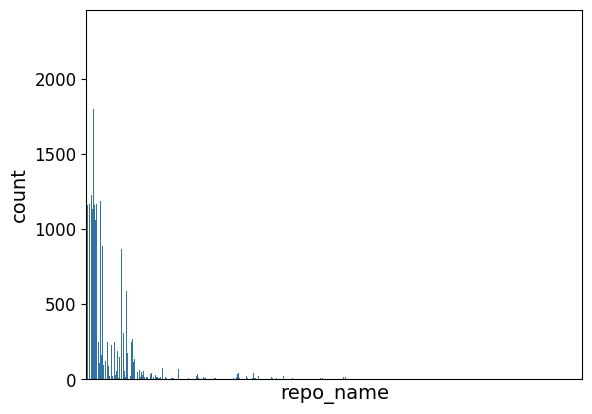

In [21]:
# distribuci√≥n repo_name
sns.countplot(df, x = "repo_name")
plt.xticks([])

([], [])

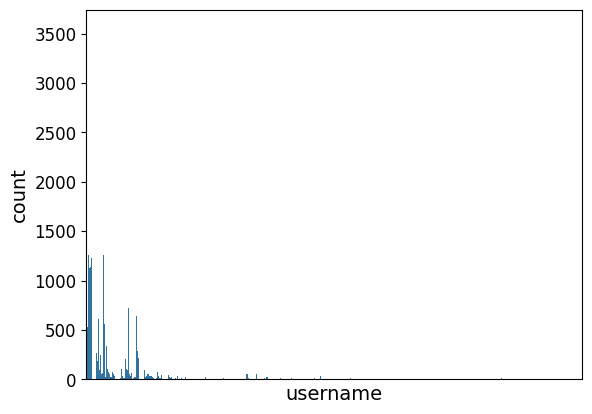

In [22]:
# distribuci√≥n username
sns.countplot(df, x = "username")
plt.xticks([])

([], [])

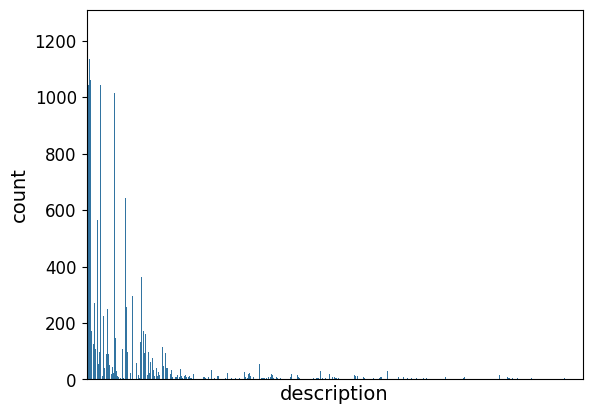

In [23]:
# distribuci√≥n descripci√≥n
sns.countplot(df, x = "description")
plt.xticks([])

Conclusiones del an√°lisis univariante:
- Ninguna variable se ajusta a la normal, la distribuci√≥n de todas ellas difiere bastante de una campana gaussiana, por lo tanto no procedimos a realizar comprobaciones estad√≠sticas.
- La mayor√≠a de variables tienden a tener una cola hacia la izquierda, lo que indica que hay muchos valores que se repiten poco y probablemente alg√∫n outlier o valor at√≠pico muy por encima de la media/moda/mediana.
- La √∫nica variable distribuida homogeneamente es la variable *rank*. Pero a√∫n as√≠ se observa que hay m√°s valor en el ranking por debajo de 75.
- La variable *last commit* es la √∫nica con una cola hacia la derecha, puede deberse a que al ser una variable temporal seg√∫n se ha ido actualizando el dataset ha ido recogiendo mas informaci√≥n sobre los commits hechos.
- Nuestra variable target, *forks*, presenta una cola a la izquierda con un peque√±o repunte entorno a los 40000.

### An√°lisis bivariante

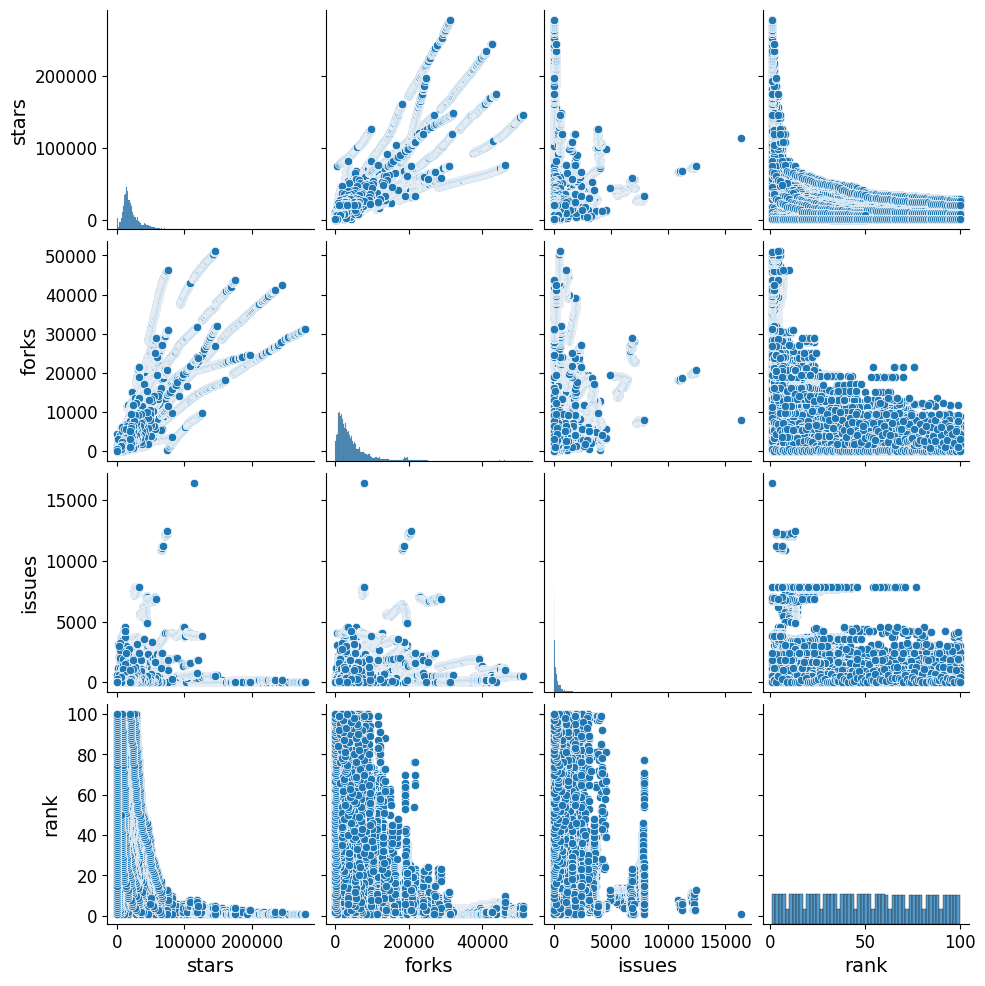

In [24]:
sns.pairplot(df[numerical_col])

<Axes: >

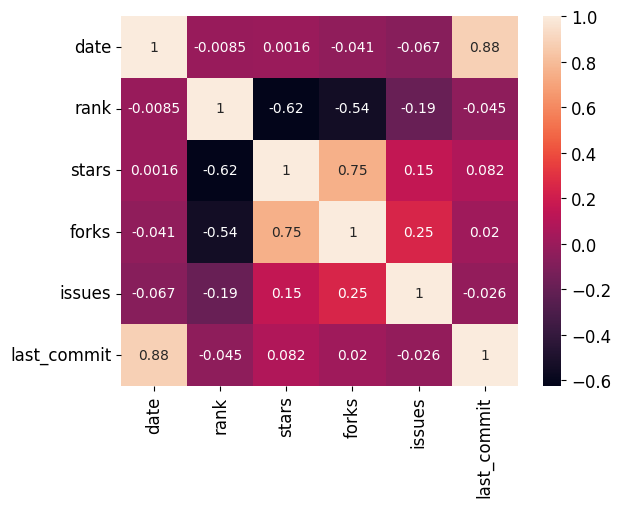

In [25]:
sns.heatmap(df[['date', 'rank', 'stars', 'forks', 'issues',
       'last_commit']].corr(), annot=True)

El an√°lisis bivariante so se va a relizar con las columnas que presentan una gran correlaci√≥n con la target mientras que el resto se a√±adir√°n al an√°lisis multivariante.

- Destacamos la correlaci√≥n de *forks* con *stars* y con *top*/*rank*.
- Tambi√©n cabe destacar la correlaci√≥n entre s√≠ de las variables previamente mentadas por su correlaci√≥n con la target.
- Otra correlaci√≥n que llama la atenci√≥n es entre las variables *date* y *last_commit*. Es posible colinealidad.

Adem√°s, vamos a crear dos columnas nuevas moment√°neamente para facilitar el proceso de graficado. Una que agrupar√° las filas de 20 en 20 seg√∫n ranking y otra que agrupar√° las filas por el a√±o de entrada. 

In [26]:
# agrupaci√≥n rank -> top
df_1 = df.copy()

df_1["top"] = range(len(df_1))

#top20
df_1["top"].loc[list(df_1[df_1["rank"] <= 20].index)] = 20

#top40
top_20_mas = list(df_1[df_1["rank"] > 20].index)
top_40_menos = list(df_1[df_1["rank"] < 41].index)
top_20_40 = [x for x in top_20_mas if x in top_40_menos]
df_1["top"].loc[top_20_40] = 40

#top60
top_40_mas = list(df_1[df_1["rank"] > 40].index)
top_60_menos = list(df_1[df_1["rank"] < 61].index)
top_40_60 = [x for x in top_40_mas if x in top_60_menos]
df_1["top"].loc[top_40_60] = 60

#top80
top_60_mas = list(df_1[df_1["rank"] > 60].index)
top_80_menos = list(df_1[df_1["rank"] < 81].index)
top_60_80 = [x for x in top_60_mas if x in top_80_menos]
df_1["top"].loc[top_60_80] = 80


#top100
top_100 = list(df_1[df_1["rank"] > 80].index)
df_1["top"].loc[top_100] = 100

df_1["top"].value_counts()

top
20     34440
40     34440
60     34440
80     33480
100    33480
Name: count, dtype: int64

In [27]:
#agrupaci√≥n a√±os date
df_1["year"] = df_1["date"].dt.year
df_1["year"].value_counts()

year
2023    36120
2020    35500
2022    34360
2019    32900
2021    26800
2024     3300
2018     1300
Name: count, dtype: int64

In [28]:
## agrupando por a√±os last commit
df_1["lc_year"] = df_1["last_commit"].dt.year
df_1["lc_year"].value_counts()

lc_year
2020    36193
2022    35929
2019    33705
2023    29673
2021    28106
2018     3173
2024     1555
2017     1449
2016      301
2015      108
2014       42
2013       30
2012       14
2011        1
2009        1
Name: count, dtype: int64

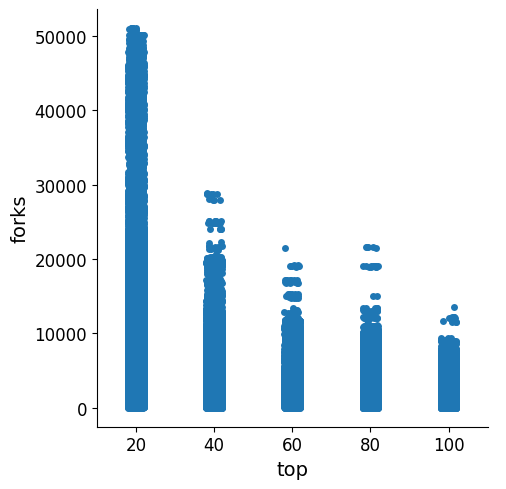

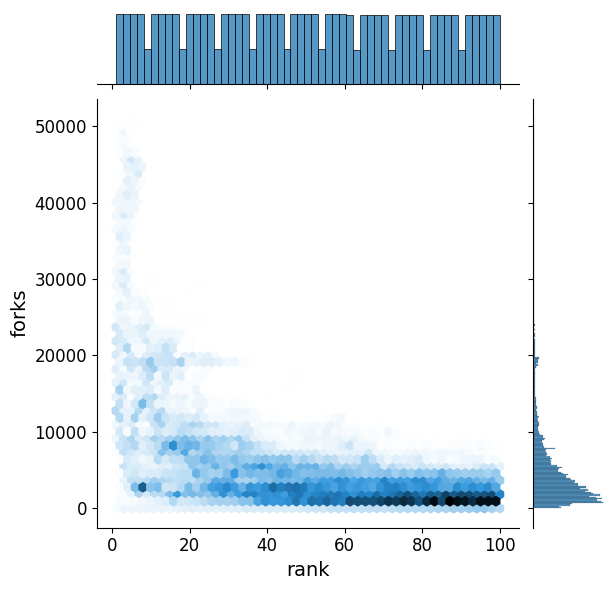

In [29]:
# forks y top/rank
sns.catplot(df_1, y= "forks", x ="top")
sns.jointplot(df_1, y= "forks", x ="rank", kind="hex")

<Axes: xlabel='stars', ylabel='forks'>

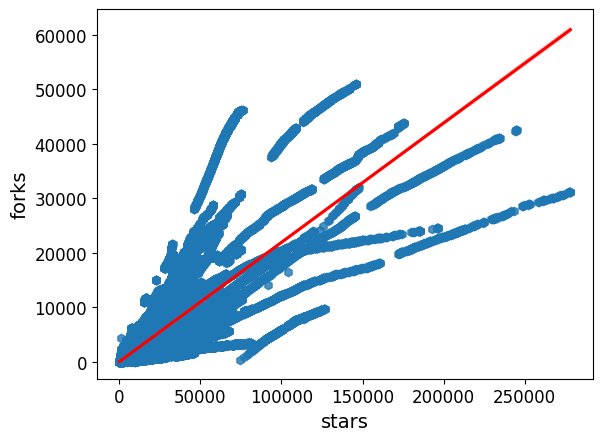

In [30]:
#stars y forks

sns.regplot(df_1, x="stars", y="forks", line_kws=dict(color="r"), marker="h")

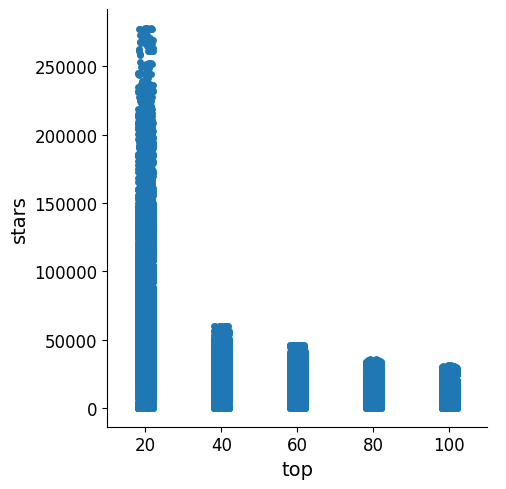

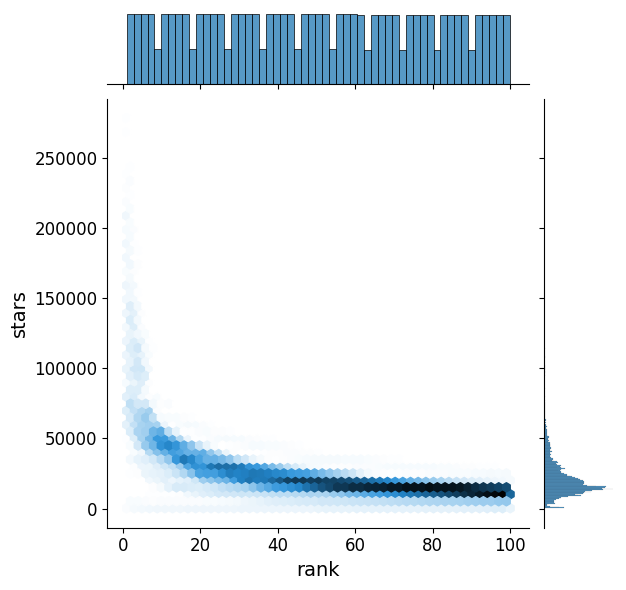

In [31]:
#stars y top/rank

sns.catplot(df_1, y= "stars", x ="top")
sns.jointplot(df_1, y= "stars", x ="rank", kind="hex")

### An√°lisis Multivariante

<Axes: xlabel='stars', ylabel='forks'>

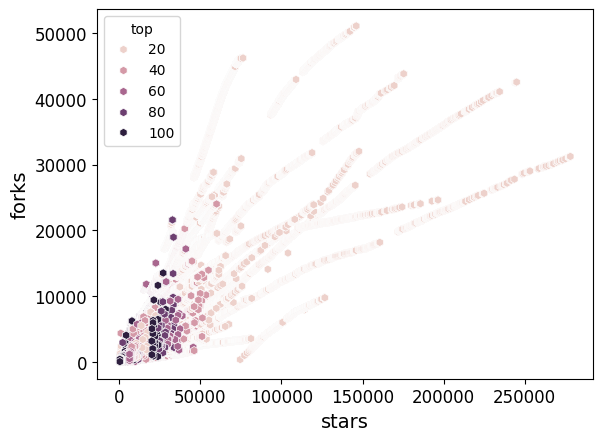

In [32]:
#stars-forks-top

sns.scatterplot(df_1, x="stars", y="forks", marker="h", hue="top")

<Axes: xlabel='year', ylabel='forks'>

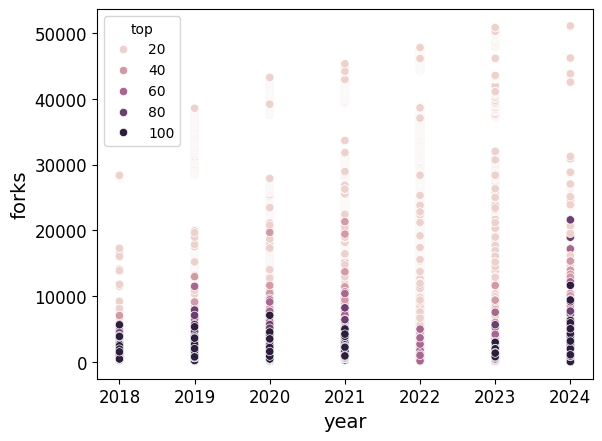

In [33]:
#stars - forks - top
sns.scatterplot(df_1, x="year", y="forks", hue="top")

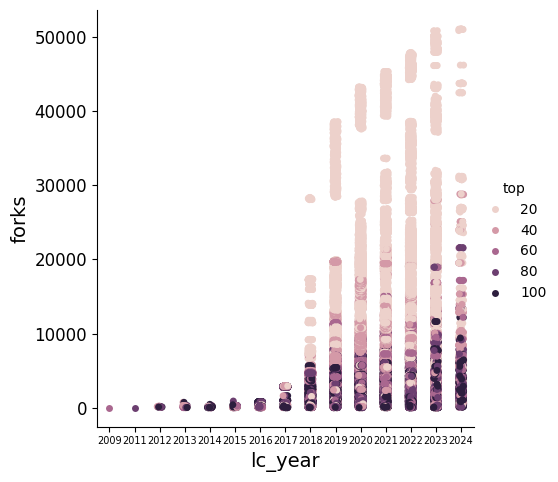

In [34]:
# last_commit, forks, top
sns.catplot(df_1, x="lc_year", y="forks", hue="top")
plt.xticks(size = 7);

Conclusiones del an√°lisis multivariante:
- Cuantas m√°s alto en el ranking y m√°s estrellas tenga un repositorio, m√°s forks se hacen del mismo.
- Pese a que no haya una fuerte correlaci√≥n, se puede observar cierta tendencia en la cual tanto en la fecha de adici√≥n de la entrada al dataset, como el √∫ltimo commit a dicho repositorio influyen en el ranking y por lo tanto en la cantidad de forks realizados.

### Conclusiones generales tras la primera exploraci√≥n y el EDA

El dataset est√° bastante limpio y excepto las columnas categ√≥ricas, el resto no necesitan demasiado preprocesamiento.

Las variables num√©ricas a priori mas importantes, con mas correlaci√≥n con nuestra variable target (*forks*), son *stars* y *rank*. Tiene sentido pues cuanto mejor valorado est√©, y m√°s popular sea el repositorio, m√°s forks deber√≠a tener.

Por √∫ltimo, pese a la poca correlaci√≥n que existe entre las variables *last_commit* y *date* con el target, se observa un patr√≥n en ambas variables que indica que cuanto mas cerca del presente este la fecha de subida de la entrada y el √∫ltimo commit, tiende a tener mas forks. Adem√°s se puede intuir cierta colinealidad entre las dos variables.

Sobre las variables categ√≥ricas, una vez sean tratadas podremos analizarlas.

## 2. Limpieza

### Valores nulos

Como vimos en la exploraci√≥n incial, el √∫nico feature con valores nulos es *description*. Al ser menos de un 1% de los datos y adem√°s una variable imposible de imputar, procedemos a eliminar estos valores nulos.

In [35]:
df.dropna(axis=0, inplace=True)

In [36]:
df.shape

(168687, 9)

### Valores At√≠picos y outliers

Tras lo visto en el EDA, no existen valores at√≠picos (imposibles o incoherentes). En cuanto a los outliers, se siente que estos valores aportan mas informaci√≥n √∫til que ruido, por lo tanto se van a mantener. 

## 3. Feature Engineering

### days since last commit

En este apartado, vamos a crear un nuevo feature *days since last commit (days_since_lc)*. Ya que en el EDA observamos que pese a la poca correlaci√≥n entre la variable *last_commit* y la target, se observaba cierta tendencia ascendente entre la cantida de forks y la proximidad con el presente del √∫ltimo commit. Con este nuevo feature, pretedemos mantener esa informaci√≥n mientras se evita la posible colinealidad que existe entre las variables *last_commmit* y *date*.

In [37]:
# Ajustando el formato de last commit a date 
lc_y_m_d = [x[0] for x in df["last_commit"].astype(str).str.split(" ")]
df["last_commit"] = lc_y_m_d
df["last_commit"] = pd.to_datetime(df["last_commit"])

# Creando el feature nuevo
df["days_since_lc"] = (df["date"] - df["last_commit"]) / timedelta(days=1)
df.head() 

date  rank             repo_name  stars  forks     username  issues  \
0 2018-12-18     1        awesome-python  58777  11448        vinta     439   
1 2018-12-18     2  system-design-primer  53575   7570  donnemartin      68   
2 2018-12-18     3                models  46039  28053   tensorflow    1324   
3 2018-12-18     4           public-apis  45373   4707    toddmotto       5   
4 2018-12-18     5            youtube-dl  44956   7820          rg3    2566   

  last_commit                                        description  \
0  2018-12-13  A curated list of awesome Python frameworks, l...   
1  2018-12-18  Learn how to design large-scale systems. Prep ...   
2  2018-12-18          Models and examples built with TensorFlow   
3  2018-12-18  A collective list of free APIs for use in soft...   
4  2018-12-18  Command-line program to download videos from Y...   

   days_since_lc  
0            5.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

Ahora procederemos a realizar un peque√±o an√°lisis exploratorio de esta columna nueva.

<Axes: >

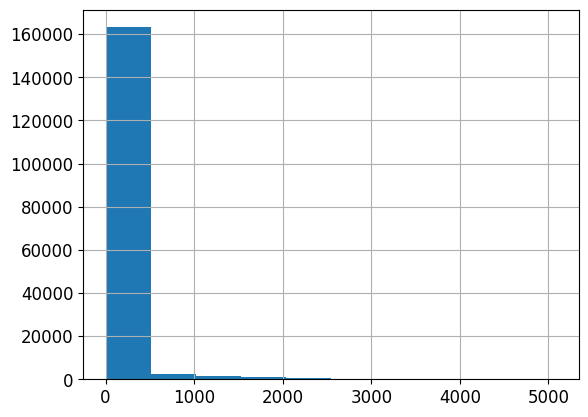

In [38]:
df["days_since_lc"].hist()

<Axes: xlabel='days_since_lc', ylabel='forks'>

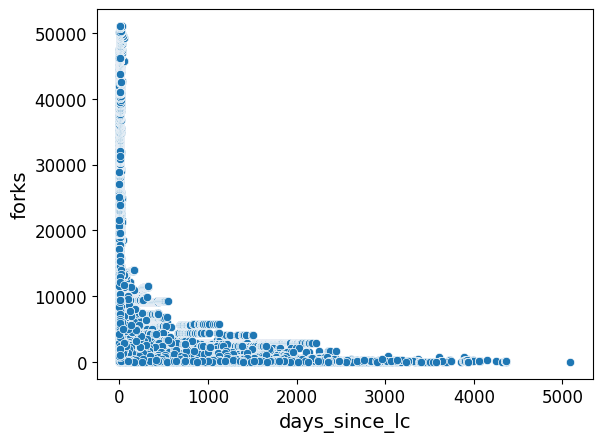

In [39]:
sns.scatterplot(df, x ="days_since_lc", y="forks")

<Axes: >

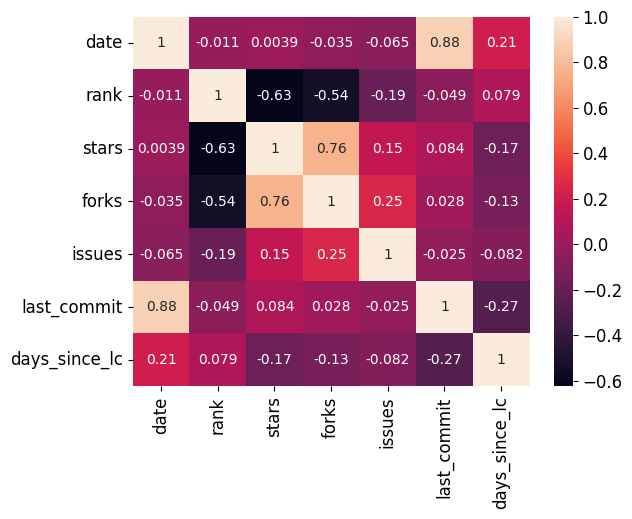

In [40]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True)

Se puede observar en las gr√°ficas que *days_since_lc* tiene un comportamiento y similar a *last_commit* y ademas hemos eliminado la posible colinealidad con la variable *date*. Por lo tanto vamos a eliminar el feature *last_commit*. 

In [41]:
df.drop(columns="last_commit", inplace=True)

### repos_by_user

La columna *username* es una variable categ√≥rica, con informaci√≥n sobre el autor del repositorio. Como vimos en la exploraci√≥n inicial, no coincide el n√∫mero de users con el la cantidad de repositorios √∫nicos, por lo tanto tiene que haber autores con mas de un repostorio. El trabajo de feature engineering que vamos a hacer con esta variable es crear una columna la cual nos indique si es un repostorio de un autor "famoso".

In [42]:
# Comprobando que haya usuarios con m√°s de un repositorio
df.groupby("username")["repo_name"].value_counts()

username   repo_name                   
0k         shyaml                             1
0rpc       zerorpc-python                     1
0voice     interview_internal_reference     988
0x5e       wechat-deleted-friends             2
0xAX       linux-insides                   1134
                                           ... 
zulip      zulip                            615
zyantific  IDASkins                           1
zygmuntz   hyperband                          1
           phraug                             1
zzw922cn   Automatic_Speech_Recognition       1
Name: count, Length: 4265, dtype: int64

In [43]:
#usuarios con m√°s de un repo
popular_users = list(df["username"].value_counts()[df["username"].value_counts() > 1].index)

#usuarios por repositorio
n_repos = [df[df["username"] == x]["repo_name"].nunique() for x in popular_users]

# Creando la columna repos_by_user
df = pd.merge(df, pd.DataFrame({'username':popular_users, 'repos_by_user':n_repos}), 'outer', on='username')

# rellenando lo NaNs que quedar√°, que son para los usuarios con solo un repositorio
df["repos_by_user"].fillna(1, inplace=True)

<Axes: >

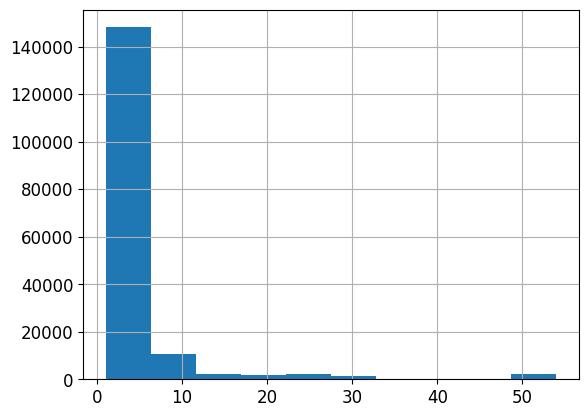

In [44]:
df["repos_by_user"].hist()

<Axes: xlabel='repos_by_user', ylabel='forks'>

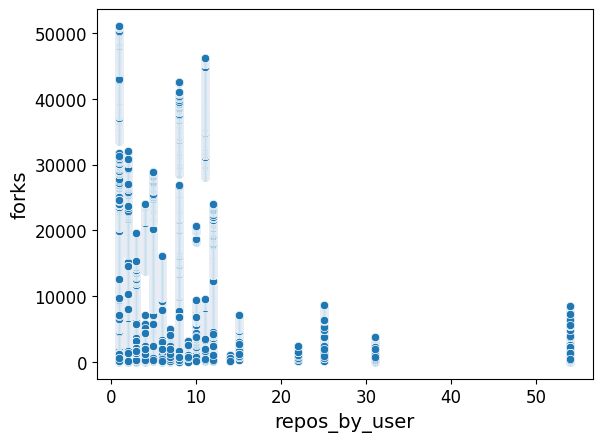

In [45]:
sns.scatterplot(df, x ="repos_by_user", y="forks")

Tras haber creado la columna *repos_by_user* y haber hecho un peque√±o an√°lisis exploratorio de la misma, se ve que existe cierta relaci√≥n inversa entre el n√∫mero de forks y los repositorios en el top del autor. A√∫n as√≠, sigue quedando la duda de si el propio nombre del autor influye.

## 4. Tranformaciones y escalado

### An√°lisis de sentimiento

Para poder extraer mas informaci√≥n de la descripci√≥n, vamos a realizar la un an√°lisi de sentimientos de la misma utilizando la libreria NLTK.

In [48]:
# Instanciando el an√°lisis de sentimiento
sia = SentimentIntensityAnalyzer()

# Creando las columnas de an√°lisis de sentimiento
res = {}

for i, x in df.iterrows():
    des = x["description"]
    repo_name = x["repo_name"]
    res[repo_name] = sia.polarity_scores(des)

vaders = pd.DataFrame(res).T

vaders.head()

neg  neu  pos  compound
shyaml                        0.0  1.0  0.0       0.0
zerorpc-python                0.0  1.0  0.0       0.0
interview_internal_reference  0.0  1.0  0.0       0.0
wechat-deleted-friends        0.0  1.0  0.0       0.0
linux-insides                 0.0  1.0  0.0       0.0

In [49]:
# a√±adiendo vaders a nuestro DataFrame
vaders = vaders.reset_index().rename(columns={"index":"repo_name"})
df = df.merge(vaders, how="left")
df.head()

date  rank                     repo_name  stars  forks username  \
0 2023-08-09    50                        shyaml    750     57       0k   
1 2023-11-20    54                zerorpc-python   3115    416     0rpc   
2 2019-07-23    92  interview_internal_reference  10536   2730   0voice   
3 2019-07-25    62  interview_internal_reference  12382   3284   0voice   
4 2019-07-27    71  interview_internal_reference  13024   3470   0voice   

   issues                                      description  days_since_lc  \
0      13                            YAML for command line          115.0   
1      46                               zerorpc for python           61.0   
2       7  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            0.0   
3       6  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            2.0   
4       7  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            1.0   

   repos_by_user  neg  neu  pos  compound  
0            1.0  0.0  1.0  0.0       0.0  
1            1.0  0.0  1.0  0.0       0.0  
2            1.0  0.0  1.0  0.0       0.0  
3            1.0  0.0  1.0  0.0       0.0  
4            1.0  0.0  1.0  0.0       0.0

Ahora vamos a realizar un peque√±o an√°lisis exploratorio de las columnas que hemos a√±adido.

<Axes: xlabel='compound', ylabel='Count'>

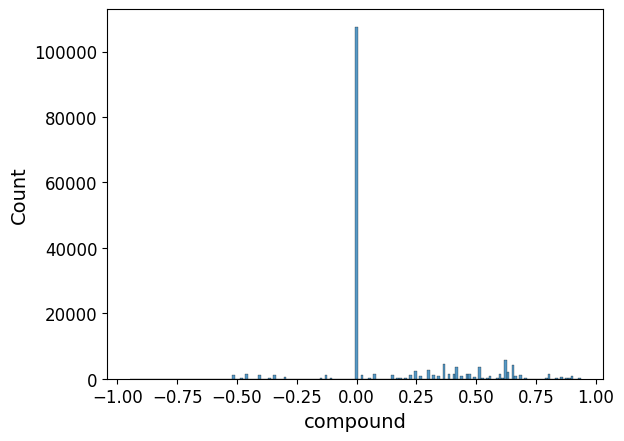

In [50]:
sns.histplot(df, x = "compound")

<Axes: xlabel='neu', ylabel='Count'>

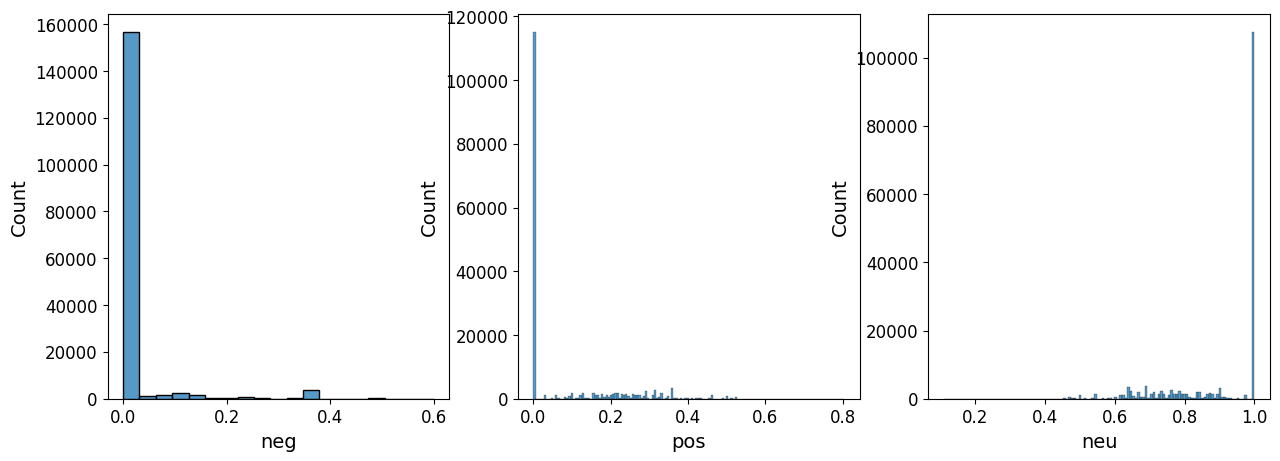

In [51]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(df, x = "neg", ax=axs[0])
sns.histplot(df, x = "pos", ax=axs[1])
sns.histplot(df, x = "neu", ax=axs[2])

<Axes: >

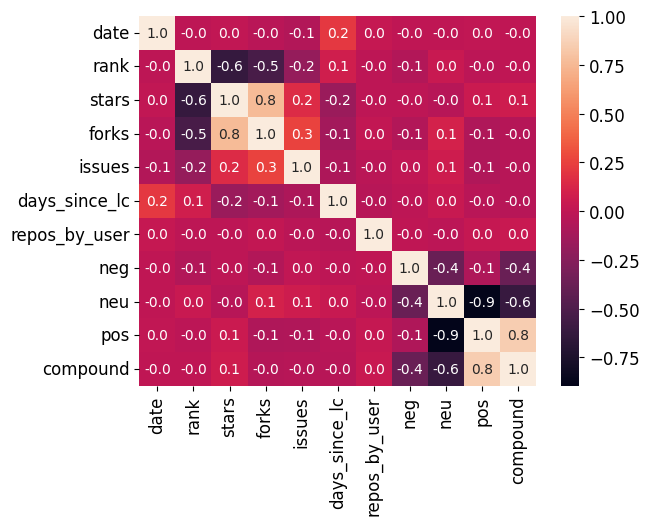

In [52]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, fmt=".1f")

Observamos que las columnas de sentimiento tienen mucha correlaci√≥n entre ellas, por ello nos vamos a quedar solo con *compound* puesto que es una aglomeraci√≥n de las 3. 

In [53]:
df.drop(columns=['neg', 'neu', 'pos'], inplace=True)

<Axes: xlabel='compound', ylabel='forks'>

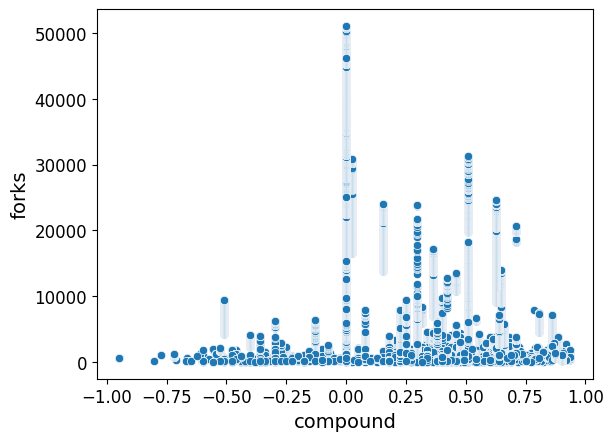

In [54]:
sns.scatterplot(df, x ="compound", y="forks")

### Label Encoder

Vamos a tranformar las dos columnas que quedan utilizando el m√©todo label encoder, puesto que crear dummies es inviable con la cantidad de √∫nicos que tienen.

In [55]:
le = LabelEncoder()

for x in df[["repo_name", "description", "username"]].columns:
    df[x] = le.fit_transform(df[x])

df.head()

date  rank  repo_name  stars  forks  username  issues  description  \
0 2023-08-09    50       3536    750     57         0      13         3871   
1 2023-11-20    54       4136   3115    416         1      46         4184   
2 2019-07-23    92       2381  10536   2730         2       7           59   
3 2019-07-25    62       2381  12382   3284         2       6           59   
4 2019-07-27    71       2381  13024   3470         2       7           59   

   days_since_lc  repos_by_user  compound  
0          115.0            1.0       0.0  
1           61.0            1.0       0.0  
2            0.0            1.0       0.0  
3            2.0            1.0       0.0  
4            1.0            1.0       0.0

## Escalado

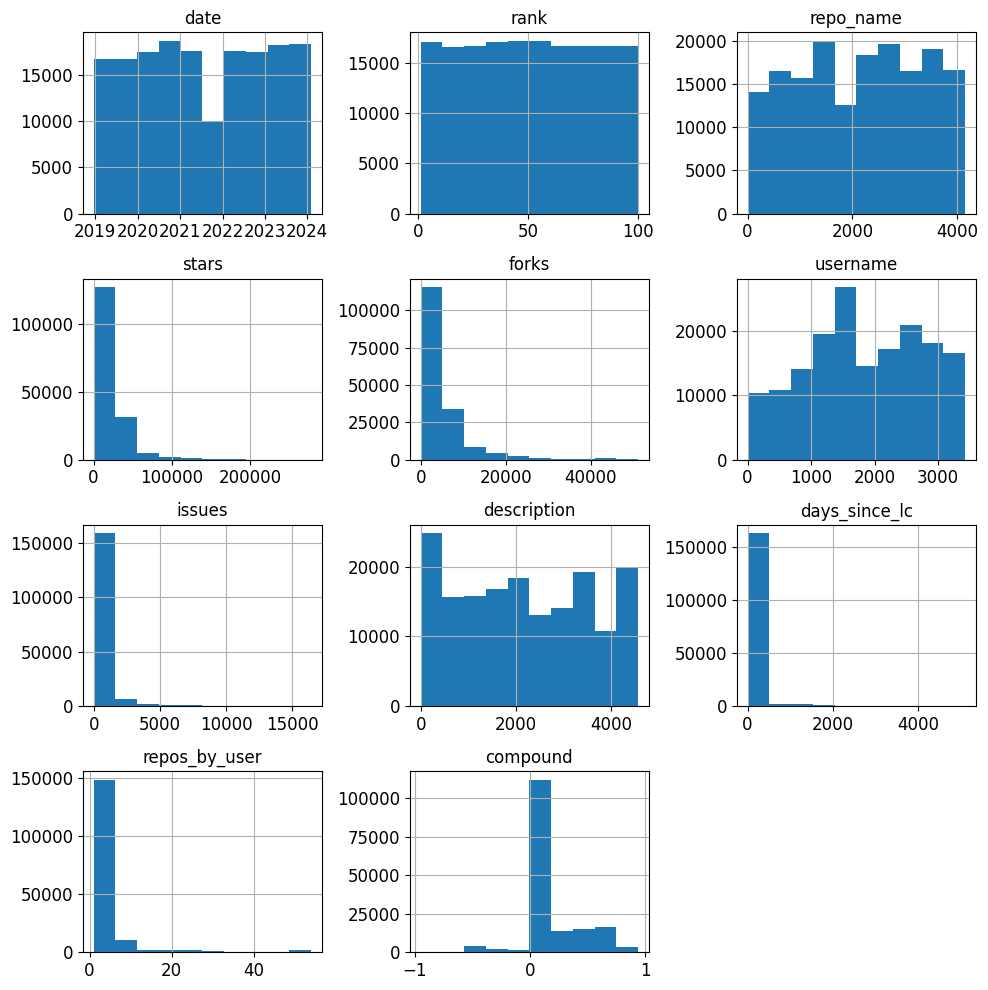

In [56]:
df.hist(figsize=(10,10))
plt.tight_layout()

Debido a las caracter√≠sticas de los features (no se ajustan a la normal, son variables discretas y hay outliers), el escalado ser√° realizado mediante el m√©todo ``RobustScaler``.

In [57]:
# Prerando la columna Date para poder escalarla
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

df.drop(columns="date", inplace=True)

In [58]:
#Escalado
RobEsc = RobustScaler()

esc_features = RobEsc.fit_transform(df)

df[['rank', 'repo_name', 'stars', 'forks', 'username', 'issues',
       'description', 'days_since_lc', 'repos_by_user', 'compound', 'day',
       'month', 'year']] = esc_features

In [59]:
df

rank  repo_name     stars     forks  username    issues  \
0       0.000000   0.625844 -1.184326 -0.707295 -1.203413 -0.354651   
1       0.081633   0.915140 -1.022450 -0.627447 -1.202730 -0.258721   
2       0.857143   0.068949 -0.514511 -0.112767 -1.202048 -0.372093   
3       0.244898   0.068949 -0.388159  0.010454 -1.202048 -0.375000   
4       0.428571   0.068949 -0.344216  0.051824 -1.202048 -0.372093   
...          ...        ...       ...       ...       ...       ...   
168682 -0.571429   0.921890  0.084736  0.879004  1.131058  4.497093   
168683 -0.204082  -0.867888 -1.175086 -0.684164  1.131741 -0.386628   
168684  0.510204   0.364995 -1.217112 -0.686833  1.132423 -0.386628   
168685 -0.775510   0.035680 -1.195551 -0.703292  1.132423 -0.375000   
168686  0.285714  -1.035198 -1.043053 -0.598310  1.133106 -0.191860   

        description  days_since_lc  repos_by_user  compound       day  \
0          0.658838       6.222222            0.0  0.000000 -0.466667   
1          0.783439       3.222222            0.0  0.000000  0.266667   
2         -0.858678      -0.166667            0.0  0.000000  0.466667   
3         -0.858678      -0.055556            0.0  0.000000  0.600000   
4         -0.858678      -0.111111            0.0  0.000000  0.733333   
...             ...            ...            ...       ...       ...   
168682     0.666799      -0.166667            0.0  2.151689  0.333333   
168683    -0.573248      73.666667            0.0  0.844595 -0.133333   
168684    -0.626990     132.277778            0.5  0.000000 -0.466667   
168685     0.582803     106.222222            0.5  0.000000 -0.266667   
168686    -0.232086       5.777778            0.0  0.000000 -0.466667   

           month  year  
0       0.333333   1.0  
1       0.833333   1.0  
2       0.166667  -1.0  
3       0.166667  -1.0  
4       0.166667  -1.0  
...          ...   ...  
168682 -0.833333   1.5  
168683 -0.666667   1.0  
168684  0.666667   1.0  
168685  0.833333   1.0  
168686  0.166667   1.0  

[168687 rows x 13 columns]

## 5. Clusterizaci√≥n

Vamos a utilizar un modelo no supervidado como preprocesamiento para poder ajustar mejor las predicciones. En este caso nos hemos decantado por el ``kmeans-minibatch`` ya que nos facilitar√° el proceso de computaci√≥n.

In [60]:
# quitamos la target

df_cluster = df.drop(columns="forks") 

# Buscando el K √≥ptimo
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(df_cluster)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

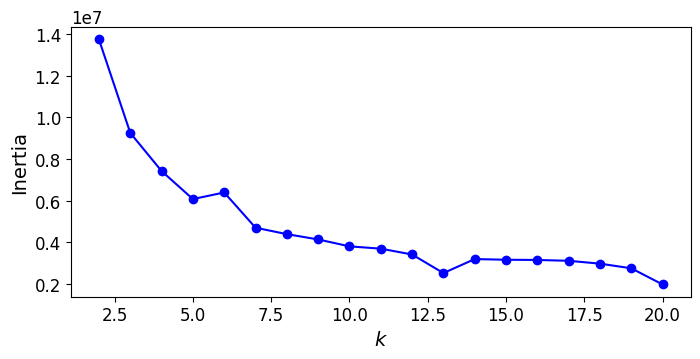

In [61]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)


plt.show()

El kmeans √≥ptimo es k=5.

In [62]:
# Instanciamos el modelo
kmeans = MiniBatchKMeans(5, random_state=42).fit(df_cluster)

In [63]:
# A√±adimos los cluster al df
clusterized = kmeans.predict(df_cluster)
df_cluster["forks"] = df["forks"]
df_cluster["cluster_result"] = clusterized

df_cluster.head()

rank  repo_name     stars  username    issues  description  \
0  0.000000   0.625844 -1.184326 -1.203413 -0.354651     0.658838   
1  0.081633   0.915140 -1.022450 -1.202730 -0.258721     0.783439   
2  0.857143   0.068949 -0.514511 -1.202048 -0.372093    -0.858678   
3  0.244898   0.068949 -0.388159 -1.202048 -0.375000    -0.858678   
4  0.428571   0.068949 -0.344216 -1.202048 -0.372093    -0.858678   

   days_since_lc  repos_by_user  compound       day     month  year     forks  \
0       6.222222            0.0       0.0 -0.466667  0.333333   1.0 -0.707295   
1       3.222222            0.0       0.0  0.266667  0.833333   1.0 -0.627447   
2      -0.166667            0.0       0.0  0.466667  0.166667  -1.0 -0.112767   
3      -0.055556            0.0       0.0  0.600000  0.166667  -1.0  0.010454   
4      -0.111111            0.0       0.0  0.733333  0.166667  -1.0  0.051824   

   cluster_result  
0               4  
1               0  
2               0  
3               0  
4               0

In [64]:
# Separamos por cluster para hacer un modelo por cada uno
df_cluster_0 = df_cluster[df_cluster["cluster_result"] == 0]
df_cluster_1 = df_cluster[df_cluster["cluster_result"] == 1]
df_cluster_2 = df_cluster[df_cluster["cluster_result"] == 2]
df_cluster_3 = df_cluster[df_cluster["cluster_result"] == 3]
df_cluster_4 = df_cluster[df_cluster["cluster_result"] == 4]

## 6. Modelo Cluster 0

### Separaci√≥n de los datos

In [65]:
# Separaci√≥n en train y test
train_0, test_0 = train_test_split(df_cluster_0, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_0.drop(columns="forks")
y = train_0["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [66]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.624881
ElasticNet            0.487021
Ridge                 0.624881
Lasso                 0.384551
DecisionTree          0.999008
RandomForest          0.999514
AdaBoost              0.766904
GradientBoost         0.952159
HistGradientBoosting  0.993810

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [67]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9989934212063188
hgb = 0.9937171665285558
rf = 0.9996108109430827


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [68]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [69]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.8648177195665906
val r2: 0.8648177195665906
MAE: 0.38250207258364044
MSE: 0.3051539078954347
MAPE: 34271978306.29895


El modelo se ajusta correctamente a los datos de validaci√≥n.

### Test

In [70]:
# Separando en x_test e y_test
X_test = test_0.drop(columns="forks")
y_test = test_0["forks"]

In [71]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.8644547498843949
MAE: 0.3858343046944803
MSE: 0.3061147517151832
MAPE: 162564482877.08176


In [72]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.8629127529798707
val 0.8648177195665906
test 0.8644547498843949


El modelo no pierde eficacia tras pasarle los datos de test, por lo tanto es un modelo listo para usarse.

## 7. Modelo Cluster 1

### Separaci√≥n de datos

In [73]:
# Separaci√≥n en train y test
train_1, test_1 = train_test_split(df_cluster_1, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_1.drop(columns="forks")
y = train_1["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [74]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.914744
ElasticNet            0.116249
Ridge                 0.914561
Lasso                 0.098906
DecisionTree          0.972287
RandomForest          0.982173
AdaBoost              0.967949
GradientBoost         0.979074
HistGradientBoosting  0.981380

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [75]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9747690813769797
hgb = 0.9819206988060246
rf = 0.9828786067206712


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [76]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [77]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9497945275122595
val r2: 0.9497945275122595
MAE: 0.02403137199177132
MSE: 0.0019879766944487743
MAPE: 0.0448802650009475


El modelo se ajusta correctamente a los datos de validaci√≥n.

### Test

In [78]:
# Separando en x_test e y_test
X_test = test_1.drop(columns="forks")
y_test = test_1["forks"]

In [79]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9794962324075995
MAE: 0.016834833374274213
MSE: 0.0008507663406894742
MAPE: 0.028014815639860698


In [80]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9812629940045631
val 0.9497945275122595
test 0.9794962324075995


## 8. Modelo Cluster 2

### Separaci√≥n de datos

In [81]:
# Separaci√≥n en train y test
train_2, test_2 = train_test_split(df_cluster_2, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_2.drop(columns="forks")
y = train_2["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [82]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.713606
ElasticNet           -0.000047
Ridge                 0.713556
Lasso                -0.000047
DecisionTree          0.973194
RandomForest          0.980341
AdaBoost              0.899642
GradientBoost         0.960068
HistGradientBoosting  0.978684

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [83]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.979605375814714
hgb = 0.986902818148142
rf = 0.9865483415626831


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [84]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 3, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [85]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9327387775934657
val r2: 0.9327387775934657
MAE: 0.03983586020197804
MSE: 0.005435807891598389
MAPE: 0.8094032457955846


El modelo se ajusta corectamente a los datos de validaci√≥n.

### Test

In [86]:
# Separando en x_test e y_test
X_test = test_2.drop(columns="forks")
y_test = test_2["forks"]

In [87]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9118363807152675
MAE: 0.04037074912158862
MSE: 0.00821856605300459
MAPE: 0.6613233791517755


In [88]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.942251975465352
val 0.9327387775934657
test 0.9118363807152675


## 9. Modelo Cluster 3

### Separaci√≥n de datos

In [89]:
# Separaci√≥n en train y test
train_3, test_3 = train_test_split(df_cluster_2, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_3.drop(columns="forks")
y = train_3["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [90]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.713606
ElasticNet           -0.000047
Ridge                 0.713556
Lasso                -0.000047
DecisionTree          0.973778
RandomForest          0.980216
AdaBoost              0.903329
GradientBoost         0.960313
HistGradientBoosting  0.978684

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [91]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.979605375814714
hgb = 0.986902818148142
rf = 0.9865483415626831


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [92]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 3, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [93]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9327387775934657
val r2: 0.9327387775934657
MAE: 0.03983586020197804
MSE: 0.005435807891598389
MAPE: 0.8094032457955846


El modelo se ajusta correctamente a los datos de validaci√≥n.

### Test

In [94]:
# Separando en x_test e y_test
X_test = test_3.drop(columns="forks")
y_test = test_3["forks"]

In [95]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9118363807152675
MAE: 0.04037074912158862
MSE: 0.00821856605300459
MAPE: 0.6613233791517755


In [96]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.942251975465352
val 0.9327387775934657
test 0.9118363807152675


## 10. Modelo Cluster 4

### Separaci√≥n de los datos

In [97]:
# Separaci√≥n en train y test
train_4, test_4 = train_test_split(df_cluster_3, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_4.drop(columns="forks")
y = train_4["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [98]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.833122
ElasticNet            0.096470
Ridge                 0.833120
Lasso                 0.026171
DecisionTree          0.998572
RandomForest          0.998929
AdaBoost              0.919344
GradientBoost         0.994417
HistGradientBoosting  0.998300

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [99]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9978075171968663
hgb = 0.9965346786251558
rf = 0.9986137997291092


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [100]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [101]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9581487109498451
val r2: 0.9581487109498451
MAE: 0.06925151083240162
MSE: 0.010011437164219858
MAPE: 0.7797544935271563


El modelo se ajusta correctamente a los datos de validaci√≥n

### Test

In [102]:
# Separando en x_test e y_test
X_test = test_4.drop(columns="forks")
y_test = test_4["forks"]

In [103]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.959310631662164
MAE: 0.06961636145944894
MSE: 0.00993885996342649
MAPE: 0.2912987457605747


In [104]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9621905326197391
val 0.9581487109498451
test 0.959310631662164
